In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nuclear-explosions-data/nuclear_explosions.csv


In [2]:
nuclear=pd.read_csv("/kaggle/input/nuclear-explosions-data/nuclear_explosions.csv")
nuclear

,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,Wr,Nan,Ug,29,7,1996
2042,INDIA,Pokhran,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,Wr,Shakti 1-3,Ug,11,5,1998
2043,INDIA,Pokhran,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,Wr,Nan,Ug,13,5,1998
2044,PAKIST,Chagai,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,Wr,Nan,Ug,28,5,1998


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

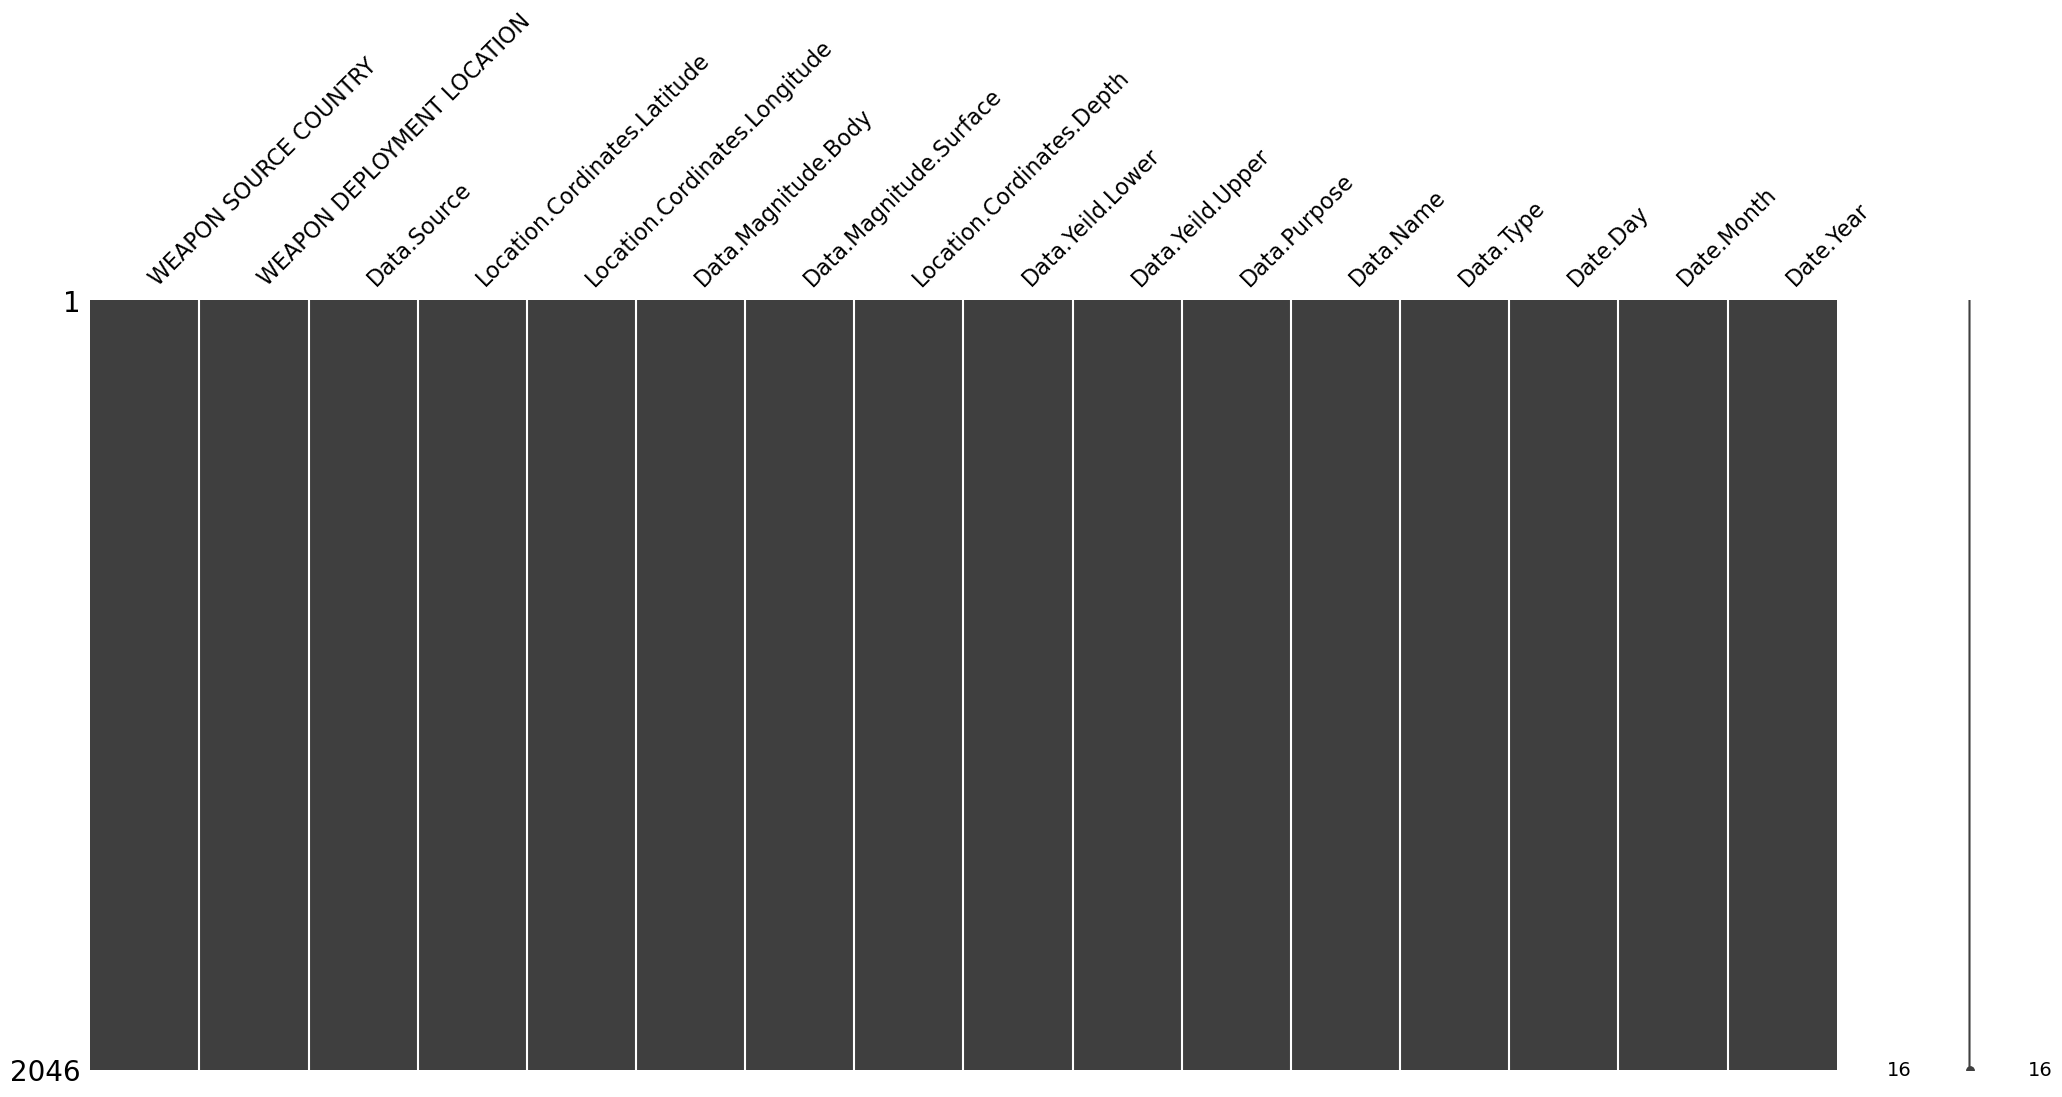

In [3]:
import missingno as msno  # checking for missing values
msno.matrix(nuclear)

### **Exploratory Data Analysis**

In [4]:
nuclear.describe()


,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Date.Day,Date.Month,Date.Year
count,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000
mean,35.462429,-36.015037,2.145406,0.356696,-0.490829,208.444528,323.431021,16.683773,7.282502,1970.896383
std,23.352702,100.829355,2.625453,1.203569,10.981072,1641.962943,2055.203066,8.799878,3.132347,10.372760
min,-49.500000,-169.320000,0.000000,0.000000,-400.000000,0.000000,0.000000,1.000000,1.000000,1945.000000
25%,37.000000,-116.051500,0.000000,0.000000,0.000000,0.000000,18.250000,9.000000,5.000000,1962.000000
50%,37.100000,-116.000000,0.000000,0.000000,0.000000,0.001000,20.000000,17.000000,8.000000,1970.000000
75%,49.870000,78.000000,5.100000,0.000000,0.000000,20.000000,150.000000,25.000000,10.000000,1979.000000
max,75.100000,179.220000,7.400000,6.000000,1.451000,50000.000000,50000.000000,31.000000,12.000000,1998.000000


In [5]:
nuclear.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEAPON SOURCE COUNTRY          2046 non-null   object 
 1   WEAPON DEPLOYMENT LOCATION     2046 non-null   object 
 2   Data.Source                    2046 non-null   object 
 3   Location.Cordinates.Latitude   2046 non-null   float64
 4   Location.Cordinates.Longitude  2046 non-null   float64
 5   Data.Magnitude.Body            2046 non-null   float64
 6   Data.Magnitude.Surface         2046 non-null   float64
 7   Location.Cordinates.Depth      2046 non-null   float64
 8   Data.Yeild.Lower               2046 non-null   float64
 9   Data.Yeild.Upper               2046 non-null   float64
 10  Data.Purpose                   2046 non-null   object 
 11  Data.Name                      2046 non-null   object 
 12  Data.Type                      2046 non-null   o

### **All nuclear explosions with a yield lower than 20 kilotons**

In [6]:
nuclear_filtered = nuclear[nuclear['Data.Yeild.Lower'] < 50]
nuclear_filtered

,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,Wr,Nan,Ug,29,7,1996
2042,INDIA,Pokhran,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,Wr,Shakti 1-3,Ug,11,5,1998
2043,INDIA,Pokhran,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,Wr,Nan,Ug,13,5,1998
2044,PAKIST,Chagai,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,Wr,Nan,Ug,28,5,1998


#### **Calculate aggregate statistics :  average magnitude of explosions for each purpose**

In [7]:
avg_magnitude_by_purpose = nuclear.groupby('Data.Purpose')['Data.Magnitude.Body'].mean()
avg_magnitude_by_purpose

Data.Purpose
Combat     0.000000
Fms        2.748485
Fms/Wr     5.550000
Me         0.000000
Nan        0.000000
Pne        4.251634
Pne/Wr     2.600000
Pne:Plo    1.507407
Pne:V      0.871429
Sam        0.208000
Sb         0.000000
Se         0.000000
Se/Wr      0.000000
Transp     0.000000
We         2.329834
We/Sam     4.833333
We/Wr      5.333333
Wr         2.013960
Wr/F/S     5.600000
Wr/F/Sa    5.350000
Wr/Fms     5.816667
Wr/P/S     5.900000
Wr/P/Sa    5.200000
Wr/Pne     3.966667
Wr/Sam     4.466667
Wr/Se      0.845455
Wr/We      5.000000
Wr/We/S    6.700000
Name: Data.Magnitude.Body, dtype: float64

## **Map explosions over geography**

In [8]:
import folium
from geopy.geocoders import Nominatim

# Create a folium map centered at a specific location
map_center = [nuclear['Location.Cordinates.Latitude'].mean(), nuclear['Location.Cordinates.Longitude'].mean()]
nuclear_map = folium.Map(location=map_center, zoom_start=3)

# Create a geolocator object to convert coordinates to location names
geolocator = Nominatim(user_agent="nuclear_explosions_map")

# Iterate over the rows of the DataFrame and add markers to the map
for index, row in nuclear.iterrows():
    lat = row['Location.Cordinates.Latitude']
    lon = row['Location.Cordinates.Longitude']
    location = geolocator.reverse(f"{lat}, {lon}")
    popup_text = f"Name: {row['Data.Name']}, Country: {row['WEAPON SOURCE COUNTRY']}, Location: {location}"
    folium.Marker(location=[lat, lon], popup=popup_text).add_to(nuclear_map)

# Display the map
nuclear_map.save("nuclear_explosions_map.html")  # Save map to an HTML file
nuclear_map

## how are we still breathing!!

## **Nuclear explosions over time**

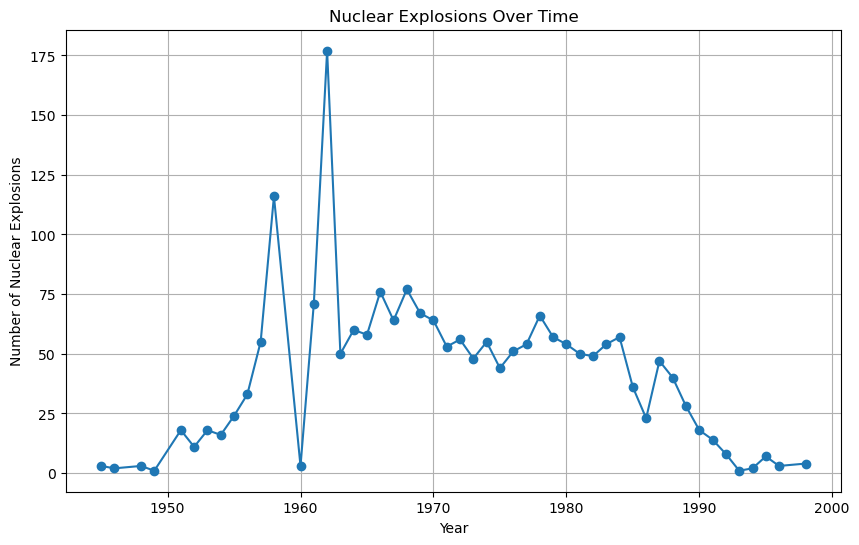

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date.Year' column to datetime data type
nuclear['Date.Year'] = pd.to_datetime(nuclear['Date.Year'], format='%Y')

# Group the data by year and count the number of nuclear explosions in each year
explosions_per_year = nuclear.groupby('Date.Year')['Data.Name'].count()

# Plot the time series of nuclear explosions over time
plt.figure(figsize=(10, 6))
plt.plot(explosions_per_year.index, explosions_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Nuclear Explosions')
plt.title('Nuclear Explosions Over Time')
plt.grid(True)
plt.show()

## seriously..

### ***Calculating the energy released***

In [10]:
# Conversion factor: 1 kiloton of TNT = 4.184 × 10^12 Joules
conversion_factor_tnt_to_joules = 4.184e12

# Calculate the total energy released in each nuclear explosion (in Joules)
nuclear['Total_Energy_Released_Joules'] = nuclear['Data.Yeild.Lower'] * conversion_factor_tnt_to_joules

# Display the DataFrame with the new column
print(nuclear[['Data.Name', 'Data.Yeild.Lower', 'Total_Energy_Released_Joules']])


       Data.Name  Data.Yeild.Lower  Total_Energy_Released_Joules
0        Trinity              21.0                  8.786400e+13
1      Littleboy              15.0                  6.276000e+13
2         Fatman              21.0                  8.786400e+13
3           Able              21.0                  8.786400e+13
4          Baker              21.0                  8.786400e+13
...          ...               ...                           ...
2041         Nan               3.0                  1.255200e+13
2042  Shakti 1-3               0.0                  0.000000e+00
2043         Nan               0.0                  0.000000e+00
2044         Nan               0.0                  0.000000e+00
2045         Nan               0.0                  0.000000e+00

[2046 rows x 3 columns]


In [11]:
nuclear

,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year,Total_Energy_Released_Joules
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945-01-01,8.786400e+13
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945-01-01,6.276000e+13
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945-01-01,8.786400e+13
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946-01-01,8.786400e+13
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946-01-01,8.786400e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,Wr,Nan,Ug,29,7,1996-01-01,1.255200e+13
2042,INDIA,Pokhran,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,Wr,Shakti 1-3,Ug,11,5,1998-01-01,0.000000e+00
2043,INDIA,Pokhran,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,Wr,Nan,Ug,13,5,1998-01-01,0.000000e+00
2044,PAKIST,Chagai,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,Wr,Nan,Ug,28,5,1998-01-01,0.000000e+00


## **Distance from Blast Center**

In [12]:
import geopy.distance

# Define the reference coordinates
reference_latitude = 32.0
reference_longitude = -106.0

# Calculate the distance from the blast center to the reference point
nuclear['Distance_From_Reference_Kilometers'] = nuclear.apply(lambda row: geopy.distance.geodesic(
    (row['Location.Cordinates.Latitude'], row['Location.Cordinates.Longitude']),
    (reference_latitude, reference_longitude)
).kilometers, axis=1)

# Display the DataFrame with the new column
print(nuclear[['Data.Name', 'Location.Cordinates.Latitude', 'Location.Cordinates.Longitude', 'Distance_From_Reference_Kilometers']])


       Data.Name  Location.Cordinates.Latitude  Location.Cordinates.Longitude  \
0        Trinity                         32.54                        -105.57   
1      Littleboy                         34.23                         132.27   
2         Fatman                         32.45                         129.52   
3           Able                         11.35                         165.20   
4          Baker                         11.35                         165.20   
...          ...                           ...                            ...   
2041         Nan                         41.69                          88.35   
2042  Shakti 1-3                         27.07                          71.70   
2043         Nan                         27.07                          71.70   
2044         Nan                         28.90                          64.89   
2045         Nan                         28.49                          63.78   

      Distance_From_Referen

In [13]:
nuclear

,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year,Total_Energy_Released_Joules,Distance_From_Reference_Kilometers
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945-01-01,8.786400e+13,72.298151
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945-01-01,6.276000e+13,10479.056382
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945-01-01,8.786400e+13,10799.992506
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946-01-01,8.786400e+13,9241.457671
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946-01-01,8.786400e+13,9241.457671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,Wr,Nan,Ug,29,7,1996-01-01,1.255200e+13,11714.039511
2042,INDIA,Pokhran,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,Wr,Shakti 1-3,Ug,11,5,1998-01-01,0.000000e+00,13462.182984
2043,INDIA,Pokhran,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,Wr,Nan,Ug,13,5,1998-01-01,0.000000e+00,13462.182984
2044,PAKIST,Chagai,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,Wr,Nan,Ug,28,5,1998-01-01,0.000000e+00,13195.904533


## **Yield Range Analysis**

In [14]:
# Calculate the range (difference) between the upper and lower yield estimates for each explosion
nuclear['Yield_Range'] = nuclear['Data.Yeild.Upper'] - nuclear['Data.Yeild.Lower']

# Display the DataFrame with the new column
print(nuclear[['Data.Name', 'Data.Yeild.Lower', 'Data.Yeild.Upper', 'Yield_Range']])


       Data.Name  Data.Yeild.Lower  Data.Yeild.Upper  Yield_Range
0        Trinity              21.0              21.0          0.0
1      Littleboy              15.0              15.0          0.0
2         Fatman              21.0              21.0          0.0
3           Able              21.0              21.0          0.0
4          Baker              21.0              21.0          0.0
...          ...               ...               ...          ...
2041         Nan               3.0              12.0          9.0
2042  Shakti 1-3               0.0              20.0         20.0
2043         Nan               0.0               1.0          1.0
2044         Nan               0.0              35.0         35.0
2045         Nan               0.0              18.0         18.0

[2046 rows x 4 columns]


In [15]:
nuclear

,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year,Total_Energy_Released_Joules,Distance_From_Reference_Kilometers,Yield_Range
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945-01-01,8.786400e+13,72.298151,0.0
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945-01-01,6.276000e+13,10479.056382,0.0
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945-01-01,8.786400e+13,10799.992506,0.0
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946-01-01,8.786400e+13,9241.457671,0.0
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946-01-01,8.786400e+13,9241.457671,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,Wr,Nan,Ug,29,7,1996-01-01,1.255200e+13,11714.039511,9.0
2042,INDIA,Pokhran,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,Wr,Shakti 1-3,Ug,11,5,1998-01-01,0.000000e+00,13462.182984,20.0
2043,INDIA,Pokhran,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,Wr,Nan,Ug,13,5,1998-01-01,0.000000e+00,13462.182984,1.0
2044,PAKIST,Chagai,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,Wr,Nan,Ug,28,5,1998-01-01,0.000000e+00,13195.904533,35.0


## **Purpose Analysis**

In [16]:
# Count the number of explosions for each purpose
purpose_counts = nuclear['Data.Purpose'].value_counts()

# Display the count of explosions for each purpose
print(purpose_counts)


Wr         1490
We          181
Pne         153
Se           71
Fms          33
Pne:Plo      27
Sam          25
Wr/Se        11
Pne:V         7
Wr/Sam        6
Wr/Fms        6
Sb            5
Transp        4
We/Sam        3
Wr/Pne        3
We/Wr         3
Wr/F/Sa       2
Fms/Wr        2
Wr/We         2
Se/Wr         2
Pne/Wr        2
Combat        2
Wr/P/Sa       1
Nan           1
Me            1
Wr/P/S        1
Wr/F/S        1
Wr/We/S       1
Name: Data.Purpose, dtype: int64


## **mapping the plot points on matplotlib**

/tmp/ipykernel_20/1746247586.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


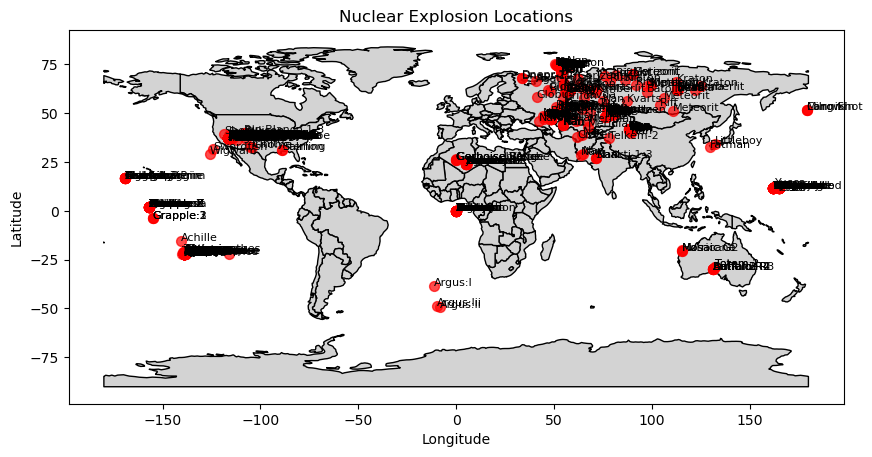

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame from the nuclear DataFrame
gdf = gpd.GeoDataFrame(nuclear, 
                        geometry=gpd.points_from_xy(nuclear['Location.Cordinates.Longitude'], nuclear['Location.Cordinates.Latitude']))

# Create a map to plot the points
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='lightgrey', edgecolor='black')

# Plot the points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.7)

# Label each point with the 'Data.Name' value
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Data.Name']):
    plt.text(x, y, label, fontsize=8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nuclear Explosion Locations')
plt.show()


## **Time series analysis of Total_Energy_Released_Joules**

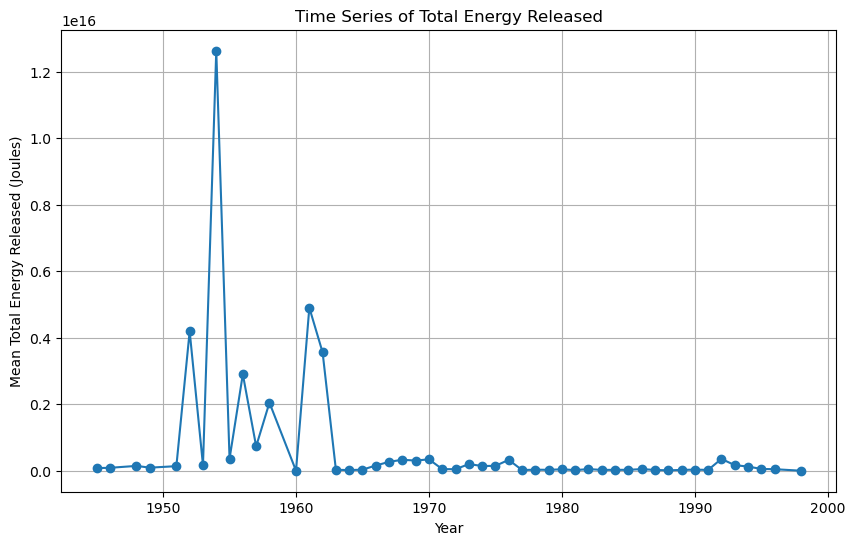

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date.Year' column to datetime data type
nuclear['Date.Year'] = pd.to_datetime(nuclear['Date.Year'], format='%Y')

# Group the data by year and calculate the mean values for 'Total_Energy_Released_Joules' and 'Distance_From_Reference_Kilometers'
time_series_data = nuclear.groupby(nuclear['Date.Year']).agg({
    'Total_Energy_Released_Joules': 'mean',
    'Distance_From_Reference_Kilometers': 'mean'
}).reset_index()

# Plot the time series of total energy released over the years
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Date.Year'], time_series_data['Total_Energy_Released_Joules'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean Total Energy Released (Joules)')
plt.title('Time Series of Total Energy Released')
plt.grid(True)
plt.show()



## **Time series analysis of distance from reference over the years**

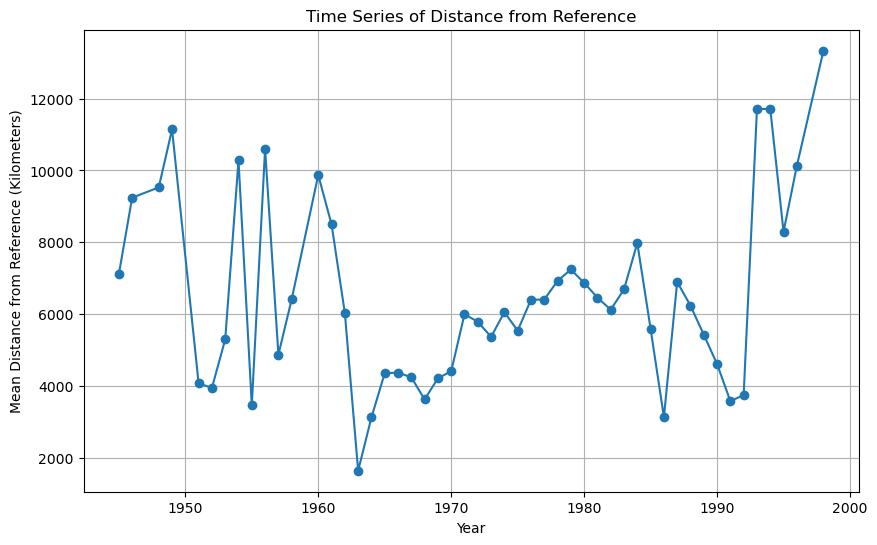

In [19]:
# Plot the time series of distance from reference over the years
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Date.Year'], time_series_data['Distance_From_Reference_Kilometers'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean Distance from Reference (Kilometers)')
plt.title('Time Series of Distance from Reference')
plt.grid(True)
plt.show()


In [20]:
nuclear

,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year,Total_Energy_Released_Joules,Distance_From_Reference_Kilometers,Yield_Range
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945-01-01,8.786400e+13,72.298151,0.0
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945-01-01,6.276000e+13,10479.056382,0.0
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945-01-01,8.786400e+13,10799.992506,0.0
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946-01-01,8.786400e+13,9241.457671,0.0
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946-01-01,8.786400e+13,9241.457671,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,Wr,Nan,Ug,29,7,1996-01-01,1.255200e+13,11714.039511,9.0
2042,INDIA,Pokhran,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,Wr,Shakti 1-3,Ug,11,5,1998-01-01,0.000000e+00,13462.182984,20.0
2043,INDIA,Pokhran,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,Wr,Nan,Ug,13,5,1998-01-01,0.000000e+00,13462.182984,1.0
2044,PAKIST,Chagai,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,Wr,Nan,Ug,28,5,1998-01-01,0.000000e+00,13195.904533,35.0
